In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from time import time
import numpy as np

In [12]:
# get features and labels
data = pd.read_pickle('pifsc_embeddings2.pickle')
features = dict(data)
data = pd.read_pickle('pifsc_embeddings.pkl')
features.update(data)

cols = ["species","image","distinctiveness","quality"]
labels1 = pd.read_csv('pifsc_labels_detail.csv')[cols]

cols = ["species","filename","distinctiveness","quality"]
labels2 = pd.read_csv('pifsc_labels2.csv')[cols]
labels2.columns = ["species","image","distinctiveness","quality"]

labels = pd.concat([labels1, labels2]).reset_index(drop=True)

In [13]:
# clean labels
is_na = labels.distinctiveness.isna()
labels = labels.loc[~is_na]
labels = labels.drop_duplicates(subset='image', keep='first')
# labels.reset_index(drop=False, inplace=True)

# clean features
imgs = labels.image.tolist()
features = {k: v for k, v in features.items() if k in imgs}
assert len(features) == len(labels)

# Distinctiveness 3

This experiment will compare the performance of a linear SVC to an rbf SVC on distinctiveness classification.

In [14]:
# get data, split
Y = labels.distinctiveness
X = np.array([features[i] for i in labels.image])
# species = labels.species.astype('category').cat.codes
# X = np.insert(X, 0, species, axis=1)
# sc = StandardScaler()
# X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y)

In [15]:
# train Logistic regression
classifiers = [LinearSVC(class_weight='balanced', random_state=42, max_iter=10000, loss='hinge'),
               SVC(class_weight='balanced', random_state=42)]
for clf in classifiers:
    clf.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [16]:
for clf in classifiers:
    pred = clf.predict(X_test)
    print(type(clf).__name__.center(53, '-'))
    print(classification_report(Y_test, pred))

----------------------LinearSVC----------------------
              precision    recall  f1-score   support

         1.0       0.90      0.85      0.87       288
         2.0       0.91      0.94      0.93       586
         3.0       0.33      0.18      0.24        11
         4.0       0.60      0.67      0.63         9

    accuracy                           0.90       894
   macro avg       0.69      0.66      0.67       894
weighted avg       0.90      0.90      0.90       894

-------------------------SVC-------------------------
              precision    recall  f1-score   support

         1.0       0.91      0.92      0.92       288
         2.0       0.94      0.96      0.95       586
         3.0       0.75      0.27      0.40        11
         4.0       1.00      0.44      0.62         9

    accuracy                           0.93       894
   macro avg       0.90      0.65      0.72       894
weighted avg       0.93      0.93      0.93       894



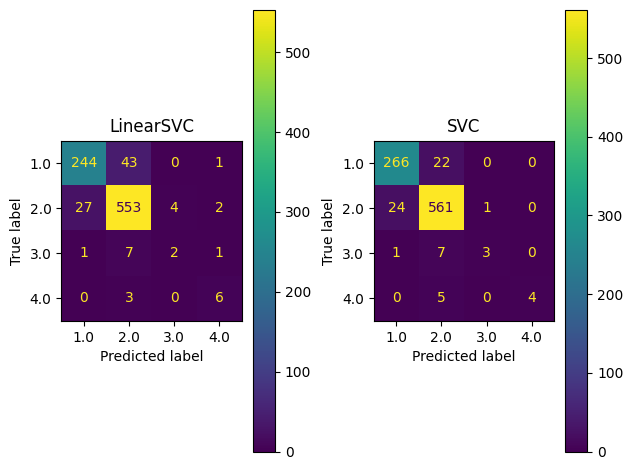

In [17]:
# results
fig, axes = plt.subplots(1, 2)
for clf, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, ax=ax)
    ax.title.set_text(type(clf).__name__)
plt.tight_layout()

In [19]:
print(Y_test.value_counts())

distinctiveness
2.0    586
1.0    288
3.0     11
4.0      9
Name: count, dtype: int64


In [3]:
print('50-50'.center(53, '-'))

------------------------50-50------------------------


In [2]:
x = 0
for i in range(0,13):
    x += 3
    print(x)

3
6
9
12
15
18
21
24
27
30
33
36
39
